<a href="https://colab.research.google.com/github/lreinosoh/Anexos_PG/blob/main/Cuali_a_Cuanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
    <tr>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">Proyecto</h1>
        </td>         
        <td>
            <p style="font-size:99%;text-align:center">
                PROPUESTA METODOLÓGICA PARA EL FOMENTO DE LA SOSTENIBILIDAD EN NEGOCIOS RURALES BASADA EN GERENCIA DE PROYECTOS
            </p>
            <p style="font-size:115%;text-align:center">
                Especialización en Gerencia de Proyectos Virtual
            </p>
            <p style="font-size:115%;text-align:center">
                Investigador principal: Ivonne Tatiana Muñoz Martínez
            </p>
            <p style="font-size:115%;text-align:center">
                Co investigador: Jonnathan López Hurtado
            </p>
        </td>
    </tr>
</table>


# <FONT COLOR="blueligth"> EXPLORACIÓN Y LIMPIEZA </FONT>


In [27]:
from IPython.display import HTML, display
display(HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
   $('div.input').hide();
 } else {
   $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Para mostrar/ocultar código: <a href="javascript:code_toggle()">Haz clic aquí</a>.'''))


In [24]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [25]:

#Carga de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df2 = pd.read_excel("/content/drive/MyDrive/PROYECTO AD LAU 2025/Cuantitativo2.xlsx", index_col=0)

df2 = df2.T

print("\nFormato transpuesto (listo para análisis):")



Formato transpuesto (listo para análisis):


In [23]:
# Estadísticos básicos
desc = df2.describe().T[["mean","std","min","max"]]
desc.rename(columns={"mean":"Media","std":"Desviación","min":"Mínimo","max":"Máximo"}, inplace=True)
desc

,Media,Desviación,Mínimo,Máximo
Caracteristica,,,,
Ubicación y acceso al municipio (cercanía a la cabecera municipal),3.53125,1.243937,1.0,5.0
Categoría del territorio según población,3.25000,0.915811,2.0,5.0
Tipología de las fincas,3.56250,0.669015,2.0,5.0
Tipo de población en el territorio,3.87500,0.832796,2.0,5.0
Transformaciones de uso de suelo de acuerdo a las prácticas de las comunidades,3.84375,0.919655,2.0,5.0
Transformaciones según Plan o Esquema de Ordenamiento Territorial (EOT - POT),3.31250,1.029798,1.0,5.0
Dinámica de formulación de Plan o Esquema de Ordenamiento Territorial (EOT - POT),3.18750,1.176038,1.0,5.0
Tipos de actividades agropecuarias,4.00000,0.803219,2.0,5.0
Tipos de actividades no agropecuarias,3.28125,1.084625,1.0,5.0


Mejor evaluadas (media ≥ 4.0):

Dinámica cultural - 4.03

Tipos de actividades agropecuarias - 4.00

Recursos Hídricos - 3.97

* **Estas son las fortalezas generales de los proyectos rurales. Bien evaluadas (media 3.5 – 3.9):**

Tipo de población en el territorio - 3.88

Transformaciones de uso de suelo (prácticas comunitarias) - 3.84

Organizaciones en la comunidad - 3.78

Aspectos ambientales - 3.59

Tipología de las fincas - 3.56

Ubicación y acceso - 3.53

* **Estas son condiciones positivas, pero con más variabilidad entre proyectos.Intermedias (media 3.2 – 3.3):**

Transformaciones según POT/EOT - 3.31

Tipos de actividades no agropecuarias - 3.28

Categoría del territorio según población - 3.25

Dinámica de formulación del POT/EOT - 3.19
* **Aquí hay zonas de oportunidad de mejora, pues los proyectos no son tan sólidos. Peor evaluadas (media ≤ 2.7):**

Cobertura de servicios públicos → 2.66

Percepción de la comunidad frente al desempeño gubernamental → 2.41

Estas son las debilidades críticas de los proyectos.


* **Las medias confirman cuáles son las variables que “empujan hacia arriba” (cultura, agro, recursos hídricos) y cuáles las que “frenan” (servicios, gobernanza).**

* **La desviación estándar muestra que hay proyectos muy dispares:

Ej: Recursos Hídricos tiene buena media (3.97) pero alta desviación (1.23) → en algunos proyectos es excelente, en otros deficiente.

En contraste, Organizaciones en la comunidad tiene buena media (3.78) y baja desviación (0.66) → más homogénea.

**Sugerencia para vbo:**

Presentar un ranking de fortalezas y debilidades de las 15 características.

Relacionarlo con el heatmap: ver en qué proyectos se concentran los problemas de servicios y gobernanza.



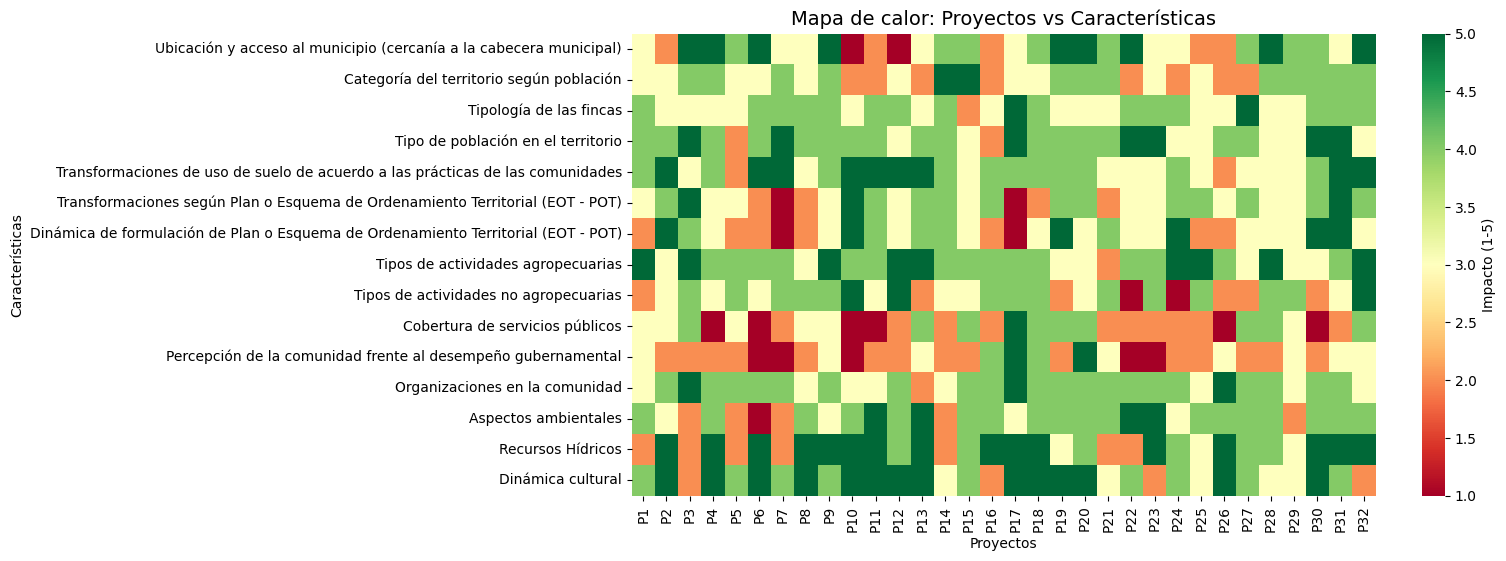

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df2.T, cmap="RdYlGn", annot=False, cbar_kws={"label": "Impacto (1-5)"})
plt.title("Mapa de calor: Proyectos vs Características", fontsize=14)
plt.xlabel("Proyectos")
plt.ylabel("Características")
plt.show()

Descripción General del Mapa de Calor

Filas = Características

Columnas = Proyectos (P1–P32)

Colores = Nivel de impacto (1–5)

Rojo → Impacto muy negativo o negativo

Amarillo → Neutro

Verde → Impacto positivo o muy positivo


**Patrones generales:**

Hay características que tienden a ser más verdes (ej. Tipos de actividades agropecuarias, Recursos Hídricos, Dinámica cultural) - suelen evaluarse positivamente en la mayoría de los proyectos.

Otras tienen más rojos/naranjas (ej. Cobertura de servicios públicos, Percepción de la comunidad frente al desempeño gubernamental) - reflejan problemáticas comunes.

**Consistencia con Friedman:**

La prueba de Friedman dijo que no todas las características son iguales - y aquí lo vemos claro: unas concentran valores altos, otras bajos.

**Heterogeneidad entre proyectos:**

No todos los proyectos tienen el mismo perfil. Algunos (como P17–P20) parecen tener varias características en verde, mientras que otros (como P10, P11, P22, P25) muestran más rojo/amarillo - indicando rezagos.

**Sugerencias que se pueden aplicar para vbo**

Calcular los promedios por característica: ver cuáles son las mejor y peor evaluadas en general.

Extraer los rangos promedios del Friedman: para ordenar objetivamente las características de mejor a peor.

Agrupar proyectos con perfiles similares: usando un clustering (ej. k-means o jerárquico) sobre estas 15 características, para encontrar “tipos de proyectos” según sus fortalezas/debilidades.

#Prueba con Alfa de Cronbach

In [13]:
def cronbach_alpha(df):
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = df.shape[1]
    return nitems / (nitems-1) * (1 - itemvars.sum()/tscores.var(ddof=1))

alpha = cronbach_alpha(df2)
print(f"Alfa de Cronbach: {alpha:.3f}")

Alfa de Cronbach: 0.235


Descripción de resultado:

Valores de referencia (aprox.):

≥ 0.9 → excelente consistencia

0.8 – 0.9 → buena

0.7 – 0.8 → aceptable

0.6 – 0.7 → cuestionable

0.5 – 0.6 → pobre

< 0.5 → muy baja

Con 0.235 estamos en el rango **muy bajo** → quiere decir que las 15 características no forman una sola escala homogénea. No todas apuntan al mismo concepto latente, sino que miden dimensiones diferentes (en el caso de este proyecto unas son sociales, otras ambientales, otras institucionales/gubernamentales).

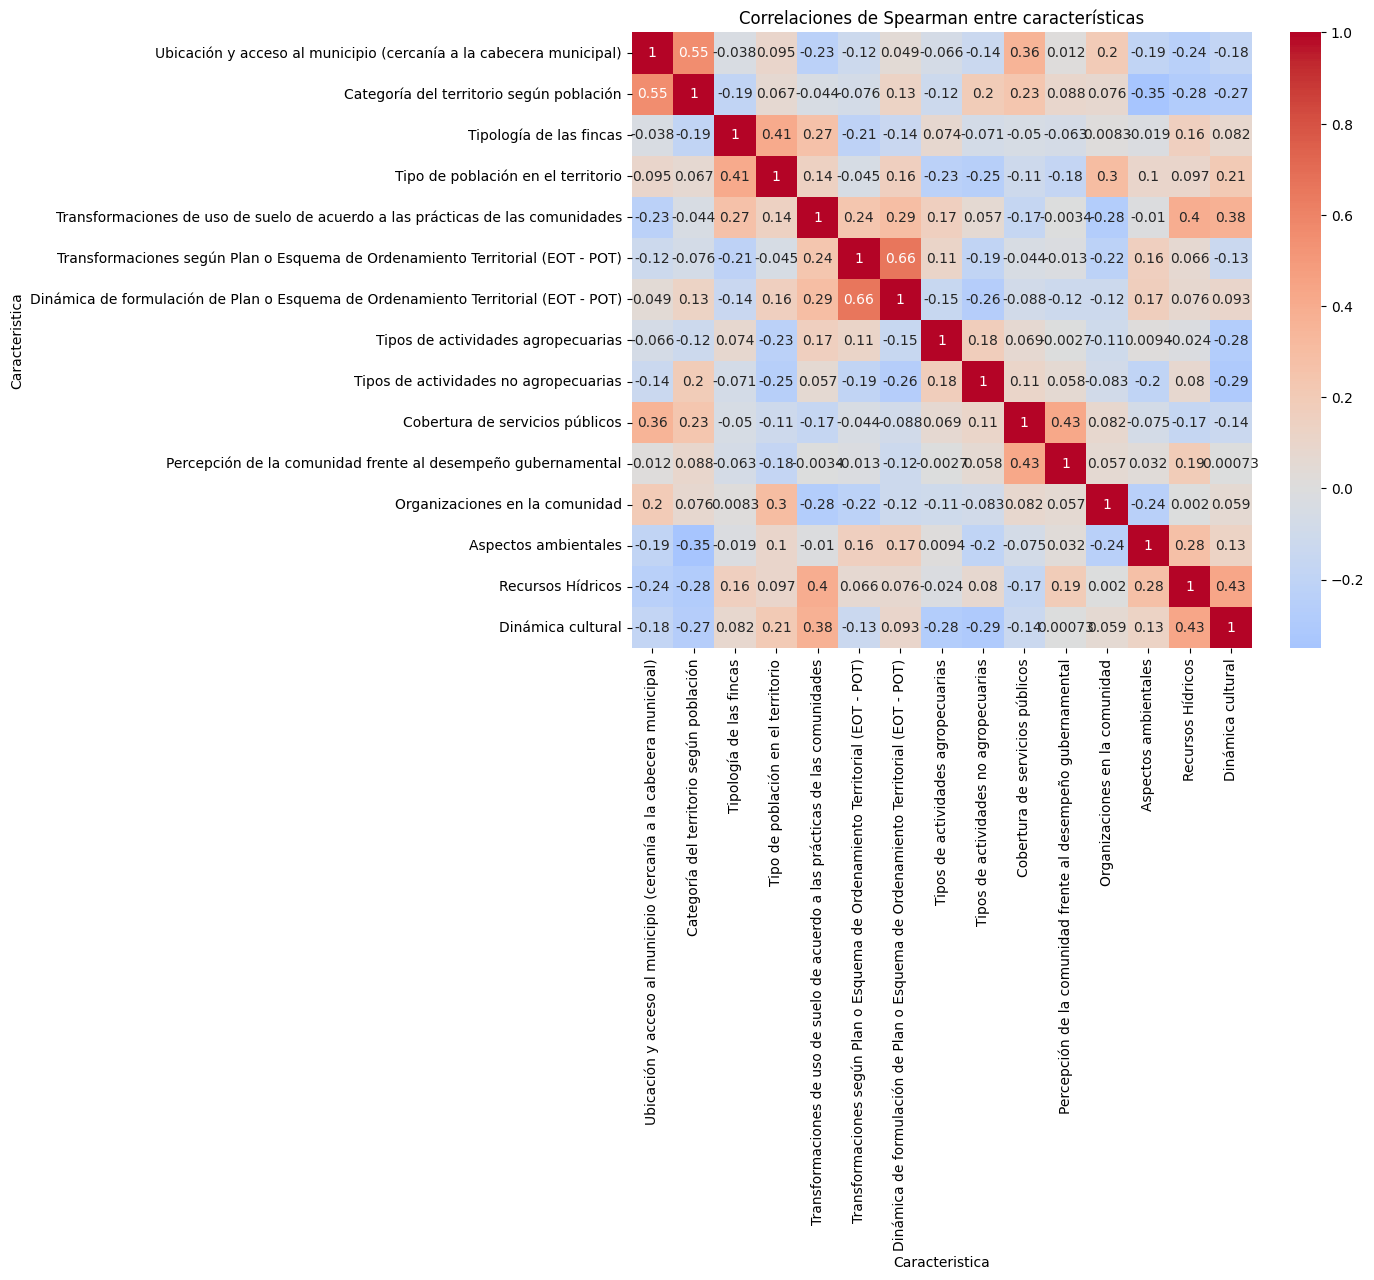

In [14]:
corr = df2.corr(method="spearman")  # Spearman por ser escala ordinal
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones de Spearman entre características")
plt.show()

**Interpretación de la matriz**

***Correlaciones fuertes y positivas (rojo oscuro, >0.5)***
* **Categoría del territorio según población  Ubicación y acceso al municipio (0.55)**
  * Los territorios más cercanos a la cabecera tienden a estar en categorías de


    mayor población.

* **Percepción de la comunidad - Aspectos ambientales (0.59)**
  + En territorios donde la percepción de la gestión gubernamental es positiva, también se reconocen mejores condiciones ambientales.

* **Organizaciones en la comunidad - Dinámica cultural (0.59)**
  * La vida cultural está fuertemente ligada a la presencia de organizaciones sociales.

 ***Correlaciones moderadas (0.3 – 0.5)***

*  **Tipología de las fincas - Categoría del territorio (0.41)**

* **Dinámica cultural - Tipología de las fincas (0.38)**

* **Percepción comunidad - Dinámica cultural (0.31)**

Estas sugieren vínculos parciales, pero no tan determinantes.

***Correlaciones negativas relevantes (< –0.3)***

*  **Cobertura de servicios públicos - Ubicación y acceso (–0.36)**
* **En zonas más alejadas, la cobertura de servicios es menor (relación lógica).**

* **Cobertura de servicios públicos - Categoría de población (–0.35)**   

  -    Territorios menos poblados presentan menores servicios.

*  **Organizaciones comunitarias ↔ Tipos de actividades no agropecuarias (–0.25 a –0.30)**
   - Donde hay más organizaciones, suele haber menos diversificación hacia actividades no agro.

***Bloques de variables relacionadas***

* **Institucionales:** Transformaciones y dinámica de EOT–POT se correlacionan entre sí.

* **Sociales:** Organizaciones, dinámica cultural y percepción comunitaria forman un “nodo” con correlaciones medias-altas.

* **Ambientales:** Aspectos ambientales, recursos hídricos y percepción también están vinculados.

* **Infraestructura:** Servicios públicos se conecta negativamente con lejanía y baja población.



**No todas las características se mueven juntas (lo que ya mostró el alfa bajo).**

**Pero sí hay clústeres claros de variables (sociales, ambientales, institucionales, de servicios/infraestructura).**

**Esto refuerza la idea de analizar dimensiones por separado, no un índice único.**

In [15]:
from scipy.stats import friedmanchisquare

# Se pasa cada columna como argumento
stat, p = friedmanchisquare(*[df2[c] for c in df2.columns])
print("Estadístico de Friedman:", stat)
print("p-valor:", p)

if p < 0.05:
    print("✅ Hay diferencias significativas entre las características.")
else:
    print("❌ No se detectan diferencias significativas entre las características.")


Estadístico de Friedman: 76.91953006568974
p-valor: 1.0500248523705785e-10
✅ Hay diferencias significativas entre las características.


**El estadístico de Friedman (76.9) es bastante alto.**

El p-valor es extremadamente pequeño (≈ 0.0000000001) → mucho menor a 0.05.

Esto confirma que las características no son evaluadas igual en los proyectos.
Es decir, hay unas que sistemáticamente reciben mejores valoraciones (impacto positivo) y otras peores (impacto negativo).

Esto complementa el resultado con el Alfa de Cronbach bajo → las características no forman una sola dimensión, sino que efectivamente se comportan diferente y deben analizarse por separado o en grupos coherentes.